## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://storage.teklia.com/shared/deepnlp-labs/stop_word_fr.txt



In [1]:
import pandas as pd

# Load dataframe from CSV file
url = "https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz"
df = pd.read_csv(url)

print(f"Nombre d'articles : {len(df)}")
df.head()

Nombre d'articles : 30165


,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT


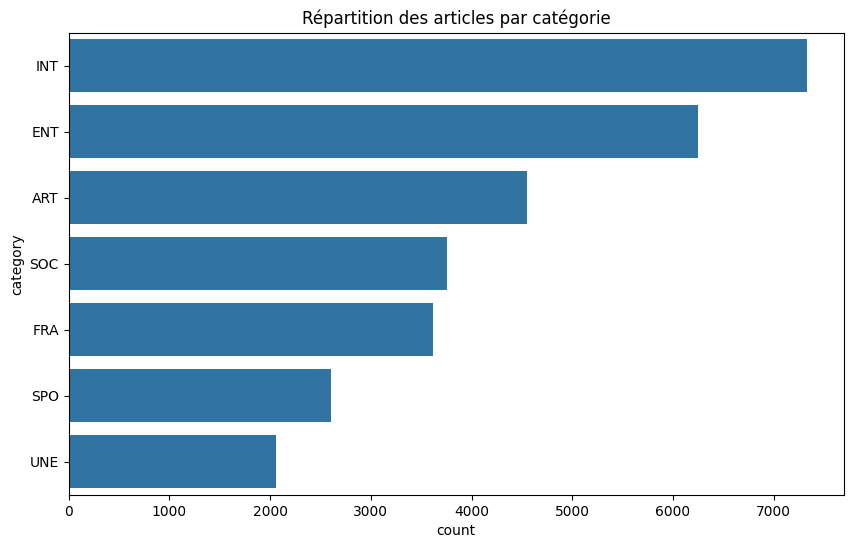

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the statistics of category
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title("Répartition des articles par catégorie")
plt.show()

In [3]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE

df[['category', 'text']].sample(5)

category  \
1088       ENT   
28244      ART   
24777      FRA   
27720      ART   
766        ENT   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

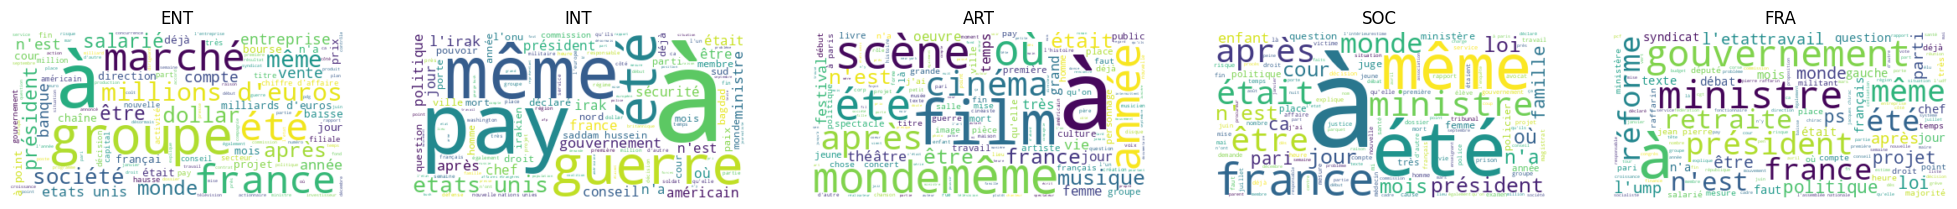

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests

# Téléchargement des stopwords si le fichier local n'existe pas
stop_words_url = "https://storage.teklia.com/shared/deepnlp-labs/stop_word_fr.txt"
response = requests.get(stop_words_url)
STOPWORDS = response.text.splitlines()

# Plot a word cloud for each category
fig, axes = plt.subplots(1, 5, figsize=(25, 10))
for i, cat in enumerate(['ENT', 'INT', 'ART', 'SOC', 'FRA']):
    text = " ".join(df[df['category'] == cat]['text'])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(cat)
    axes[i].axis("off")
plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [5]:
from sklearn.model_selection import train_test_split

# Features et Target
X = df['text']
y = df['category']

# Split 80% train, 20% rest (qui sera divisé en 10% dev, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {len(X_train)}, Dev size: {len(X_dev)}, Test size: {len(X_test)}")

Train size: 24132, Dev size: 3016, Test size: 3017


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Create document vectors (1000 most frequent words)
vectorizer = CountVectorizer(max_features=1000)

# Fit on train and transform all sets
X_train_counts = vectorizer.fit_transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [7]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)

# Evaluate
print(f"Accuracy Train: {nb_classifier.score(X_train_counts, y_train):.4f}")
print(f"Accuracy Dev: {nb_classifier.score(X_dev_counts, y_dev):.4f}")

Accuracy Train: 0.7285
Accuracy Dev: 0.7142


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

# Application de TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_dev_tfidf = tfidf_transformer.transform(X_dev_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Ré-entraînement
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

print(f"Accuracy Dev (TF-IDF): {nb_tfidf.score(X_dev_tfidf, y_dev):.4f}")

Accuracy Dev (TF-IDF): 0.7314


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


              precision    recall  f1-score   support

         ART       0.75      0.86      0.80       466
         ENT       0.75      0.86      0.80       598
         FRA       0.66      0.65      0.66       357
         INT       0.75      0.89      0.81       750
         SOC       0.68      0.61      0.64       364
         SPO       0.95      0.75      0.84       278
         UNE       0.00      0.00      0.00       204

    accuracy                           0.75      3017
   macro avg       0.65      0.66      0.65      3017
weighted avg       0.70      0.75      0.72      3017



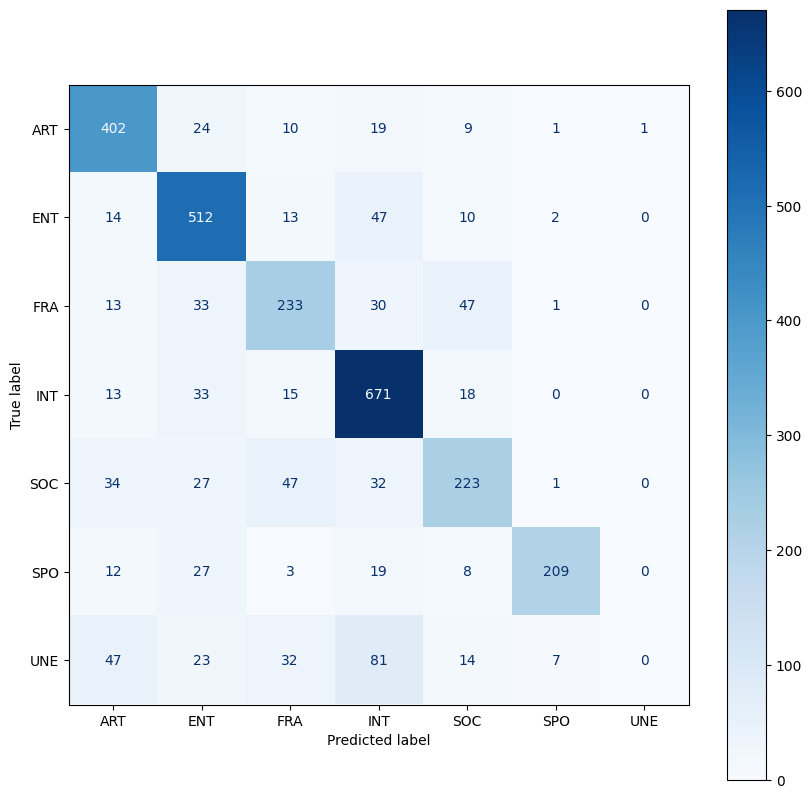

In [9]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Prédictions
y_pred = nb_tfidf.predict(X_test_tfidf)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(nb_tfidf, X_test_tfidf, y_test, ax=ax, cmap='Blues')
plt.show()

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Filter out UNE and merge FRA/SOC
df_clean = df[df['category'] != 'UNE'].copy()
df_clean['category'] = df_clean['category'].replace({'FRA': 'FRASOC', 'SOC': 'FRASOC'})

# 2. Split
X_c = df_clean['text']
y_c = df_clean['category']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

# 3. TfidfVectorizer (combine Count + Tfidf)
vectorizer_c = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer_c.fit_transform(X_train_c)
X_test_vec = vectorizer_c.transform(X_test_c)

# 4. Train & Eval
nb_clean = MultinomialNB()
nb_clean.fit(X_train_vec, y_train_c)
print(f"New Accuracy: {nb_clean.score(X_test_vec, y_test_c):.4f}")

New Accuracy: 0.8305


# Classification using sentence embeddings

Word embeddings were initially developed to calculate dense vector representations of words that encode syntax and semantics. Word embedding such as BERT can be extended and trained to encode the semantic meaning of sentences or short paragraphs. These models are trained using pairs of similar, neutral or contradictory sentences using a [Siamese neural network](https://en.wikipedia.org/wiki/Siamese_neural_network). The model is optimised to minimise the distance between the embeddings of similar sentences and maximise the distance between the embeddings of contradictory sentences. Once trained, these models can be used to encode documents of variable (but bounded) length into fixed-length embeddings.


In this section, we will use sentence embeddings to encode Le Monde articles and classify them with a simple Multi-layer Perceptron classifier. The [sentence-transformers library](https://www.sbert.net/index.html) makes it easy to encode documents into embeddings: https://www.sbert.net/examples/sentence_transformer/applications/computing-embeddings/README.html
The [paraphrase-multilingual-MiniLM-L12-v2](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) model allows texts in different languages with a maximum length of 128 tokens to be encoded into a single 384-dimensional embedding vector.

Your task is to
- load the paraphrase-multilingual-MiniLM-L12-v2 model
- merge the previous train and dev (into train_dev) sets because the MLP classifier uses part of the train set for [early stopping](https://en.wikipedia.org/wiki/Early_stopping)
- encode the train_dev and test texts with the embeddings model
- encode the targets of the train_dev and test sets. This encoding is needed because the MLP classifier does not handle string labels.
- define an [MLP classifier from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) 
- train the classifier on train_dev
- evaluate the classifier on test
- compare the results with the previous classifier







In [11]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

# Load model
model_sbert = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# On utilise df_clean pour comparer sur les mêmes bases
X_train_dev, X_test_final, y_train_dev, y_test_final = train_test_split(X_c, y_c, test_size=0.1, random_state=42)

# Encode texts (C'est long, environ 1-2 minutes)
X_train_embed = model_sbert.encode(X_train_dev.tolist(), show_progress_bar=True)
X_test_embed = model_sbert.encode(X_test_final.tolist(), show_progress_bar=True)

# Encode targets
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_dev)
y_test_enc = le.transform(y_test_final)

# Define and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=500, early_stopping=True)
mlp.fit(X_train_embed, y_train_enc)

print(f"MLP Test Accuracy: {mlp.score(X_test_embed, y_test_enc):.4f}")

/opt/python/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 199/199 [00:00<00:00, 841.60it/s, Materializing param=pooler.dense.weight]                               
BertModel LOAD REPORT from: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Batches: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]


MLP Test Accuracy: 0.8709


## What about the LLMs?

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [12]:
from transformers import pipeline
import time
import pandas as pd
from sklearn.metrics import classification_report

# 1. Initialisation du pipeline Zero-Shot
# Le pipeline s'occupe de charger le modèle ET le tokenizer automatiquement
model_name = "MoritzLaurer/mDeBERTa-v3-base-mnli-xnli"
classifier_zs = pipeline("zero-shot-classification", model=model_name)

# 2. Définition des classes (Labels)
# On utilise des noms explicites en français pour que le modèle comprenne le sens sémantique
candidate_labels = ["entreprise", "international", "art", "société", "sport", "livre", "télévision"]

# Mapping pour faire correspondre les labels du dataset avec nos labels explicites
# On utilise le dataset nettoyé de la cellule précédente (sans 'UNE' et avec 'FRASOC' -> 'société')
label_mapping = {
    "ENT": "entreprise", 
    "INT": "international", 
    "ART": "art", 
    "FRASOC": "société", 
    "SPO": "sport", 
    "LIV": "livre", 
    "TEL": "télévision"
}

# 3. Évaluation sur 100 articles (pour la rapidité)
test_subset = df_clean.sample(100, random_state=42)
predictions = []
true_labels = []

print(f"Début de l'inférence sur 100 articles avec {model_name}...")
start_time = time.time()

for _, row in test_subset.iterrows():
    # Note : On tronque à 500 caractères car les LLM ont une limite de tokens 
    # et l'essentiel de l'info est souvent au début de l'article.
    text_to_test = row['text'][:500]
    
    result = classifier_zs(text_to_test, candidate_labels=candidate_labels)
    
    # Le modèle renvoie les labels classés par probabilité décroissante
    # On prend le premier (le plus probable)
    predictions.append(result['labels'][0])
    true_labels.append(label_mapping[row['category']])

end_time = time.time()

# 4. Affichage des résultats
total_time = end_time - start_time
print(f"--- Résultats ---")
print(f"Temps total pour 100 articles : {total_time:.2f} secondes")
print(f"Temps moyen par article : {total_time/100:.2f} secondes")
print(classification_report(true_labels, predictions))

Loading weights: 100%|██████████| 202/202 [00:00<00:00, 789.78it/s, Materializing param=pooler.dense.weight]                                       
DebertaV2ForSequenceClassification LOAD REPORT from: MoritzLaurer/mDeBERTa-v3-base-mnli-xnli
Key                             | Status     |  | 
--------------------------------+------------+--+-
deberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Début de l'inférence sur 100 articles avec MoritzLaurer/mDeBERTa-v3-base-mnli-xnli...
--- Résultats ---
Temps total pour 100 articles : 1344.65 secondes
Temps moyen par article : 13.45 secondes
               precision    recall  f1-score   support

          art       1.00      0.12      0.22        16
   entreprise       0.05      0.05      0.05        22
international       0.35      0.26      0.30        23
        livre       0.00      0.00      0.00         0
      société       0.41      0.62      0.49        29
        sport       1.00      0.30      0.46        10
   télévision       0.00      0.00      0.00         0

     accuracy                           0.30       100
    macro avg       0.40      0.19      0.22       100
 weighted avg       0.47      0.30      0.30       100



/opt/python/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/python/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/python/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
